<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab1m/blob/main/collision/sphere_collision_sliding_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1m Spheres scattering after collision

This notebook documents a **minimal impulsive collision model** for two identical spheres colliding at low speed.


Evgeny Kolonsky 2025

![figure](https://raw.githubusercontent.com/evgeny-kolonsky/Lab1m/main/collision/collision.gif)


# Coordinate system

- $Ox$ — along the initial velocity of sphere 1.
- $Oy$ — in the horizontal plane, perpendicular to $Ox$
- $Oz$ - vertical, perpendicular to the plane of motion $(x, y)$

Positive angles direction: rotation from $x$ to $y$, counterclockwise.

# Model assumptions
- Two identical spheres: mass $m$, radius $R$, moment of inertia $I=\frac{2}{5}mR^2$ (uniform solid sphere).
- Sphere **2** is initially at rest: $\vec v_{20}=0$, $\vec\omega_{20}=0$.
- Sphere **1** has initial translational velocity $\vec v_{10}=(v_0,0,0)$.
- Sphere **1** has initial roll and spin  $\vec \omega_{10}=(0, \frac{v_0}{R}, s)$.
- Sufrace friction is not considered.
- Impact occurs when the line of centers makes angle $\alpha$ with the $x$-axis.
- Geometry of impact:
  - vector $\vec n = (\cos\alpha, \sin\alpha, 0) $ is directed from the center of sphere 1 to the center of sphere 2.
  - vector $\vec t = (-\sin\alpha, \cos\alpha, 0)$ is perpendicular to $\vec n$ in the plane of motion $(x,y)$
- **Impact** is described by impulse $\vec J$
$$
\vec J = \int \vec F_{\textrm{contact}} dt,
$$
We adopt the **convention: sphere 2 receives $+\vec J$ and sphere 1 receives $-\vec J$**.
- **Normal restitution** (not necessarily perfectly elastic) with restitution coefficient $e\in[0,1]$. Ideal elastic case $e=1$, ideal inelastic $e=0$.
$$
(\vec v_1-\vec v_2)\cdot\vec n = -e\,(\vec v_{10}-\vec v_{20})\cdot\vec n.
\tag{1}
$$
For steel spheres $e\approx 0.95$.

- **Friction at contact (kinetic)**: the tangential impulse $\vec J_\perp \equiv \vec J_{tz}$ magnitude satisfies
$$|J_{\perp}|=  \mu J_n,$$
here $\mu$ - friction coefficient. For steel spheres friction $\mu \approx 0.1 \dots 0.4$.
The friction direction is defined by relative bodies velocity at contact point.
- In this notebook we use  billiard-type approximation for planar scattering: the motion is in $(x,y)$ plane, motion in $z$-axis is prohibited. We solve all equations in 3D and drop $z$ - component of velocity after collision.





# Linear momentum conservation
Impulse - velocity relations:
$$
m(\vec v_1-\vec v_{10}) = -\vec J,\\
m(\vec v_2-\vec v_{20}) = +\vec J.
\tag{2}
$$
Check: Total linear momentum is conserved automatically:
$$
m\vec v_{10} + m\vec v_{20} = m\vec v_1 + m\vec v_2.
$$



# Normal impulse $J_n$
The relative normal velocity (of the centers) along $\vec n$ changes according to eq.(1).
$$
(\vec v_1-\vec v_2)\cdot\vec n = -e\,(\vec v_{10}-\vec v_{20})\cdot\vec n.
$$
Using normal restitiotion equation (1) and impulse conservation law (2), and noting $\vec J\cdot\vec n=J_n$, we obtain:
$$
\boxed{\ J_n = \frac{m}{2}(1+e)\,(\vec v_{10}-\vec v_{20}) \cdot\vec n\ }.
\tag{3}
$$



# Tangential impulse $J_\perp$


The sliding regime is defined by relative velocity in contact point:
$$
\vec v_{c1} = \vec v_1 + \vec \omega_1 \times (R \vec n), \\
\vec v_{c2} = \vec v_2 + \vec \omega_2 \times (-R \vec n),\\
\vec g \equiv \vec v_{c1} - \vec v_{c2}
$$

Normal component of relative velocity $g_n$ and elastity restitution value $e$ define normal component of collision impulse $J_n$.

Tangential component of relative velocity $\vec g_\perp = \vec g - \vec g_n $ define direction of "drag" impulse.  Friction coefficent $\mu$ define value of drag impulse acting on sphere 2:
$$
\boxed{\vec J_\perp = \mu J_n  \frac{\vec g_\perp}{|g_\perp|} }\quad \textrm{when} \quad \vec g_\perp \neq 0.
\tag{4}
$$



# Velocities after collision

$$
 \vec v_1 =  \vec v_{10} - \vec J / m\\
\vec v_2 =  \vec v_{20} + \vec J / m.
\tag{5}
$$



In [20]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters, constants and auxillary functions

In [21]:
v0 =1 # initial velocity of sph1ere
R = 1 # radius
m = 1 # mass

# x y z axis unit vectors
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

V10 = np.array([v0, 0, 0])
W10 = np.array([0, 0, 0])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

Angle between vectors $\vec a$ and $\vec b$ both lying in plane $(x, y)$ is calculated from cosine
$$
\cos \theta = \frac{\vec a \cdot \vec b}{|a| |b|} \\
$$
with direction defined by sign
$$
 (\vec a \times \vec b) \cdot \vec z
$$

In [22]:
def angle(a, b):
  # suggested that vectors are lying in plane(xy)
  # angle is defined with sign: when rot(a, b) aligned with z, the angle is positive
  # when aligned with -z - negative

  cs = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
  sign = np.sign( np.cross(a, b) @ z)
  return sign * np.arccos(cs) * 180 / np.pi

# test
alpha_deg = 20
a = np.deg2rad(alpha_deg)

c, s = np.cos(a), np.sin(a)
rotation_matrix = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

n = rotation_matrix @ x
t = rotation_matrix @ y

ans = angle(x, n)
print(f'Angle between x and n: {ans:.1f} degrees')
ans = angle(n, x)
print(f'Angle between n and x: {ans:.1f} degrees')



Angle between x and n: 20.0 degrees
Angle between n and x: -20.0 degrees


# Scattering angle




In [27]:
def scattering_angle(alpha_deg, mu, e):
  a = np.deg2rad(alpha_deg)
  c, s = np.cos(a), np.sin(a)
  rotation_matrix = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

  n = rotation_matrix @ x
  t = rotation_matrix @ y

  # Contact point velocity
  VC1 = V10 + np.cross(W10, R * n)
  VC2 = V20 + np.cross(W20, -R * n)
  # Relative velocity at contact point
  G = VC1 - VC2
  # vector - Component of G in n direction
  Gn = (G @ n) * n
  # vector - component of G in tz plane (perpendicular to n)
  Gtz = G - Gn

  # normal impulse
  Jn = m / 2 * (1 + e) * Gn

  # Slipping impulse in drag direction
  if np.linalg.norm(Gtz) > 0:
    Jtz =  mu * np.linalg.norm(Jn) * Gtz / np.linalg.norm(Gtz)
  else:
    Jtz = np.array([0,0,0])

  Jt = (Jtz @t ) * t

  J = Jn + Jt
  # Velocity after impact
  V1 = V10 - J / m
  V2 = V20 + J / m



  # find angles
  th1 = angle(x, V1)
  th2 = angle(x, V2)
  th = angle(V1, V2)
  return th, th1, th2

# test
v0 =1
R = 1
m = 1
roll = v0 / R
spin = 0. * roll
V10 = np.array([v0, 0, 0])
W10 = np.array([0, roll, spin])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

print('Collision angle scan')
for a in [0, 20, 30, 45, 60, 90]:
    th, th1, th2 = scattering_angle(a, mu=0.4, e=0.95)
    print(f'{a} θ: {th:7>.0f} θ1: {th1:7>.0f} θ2: {th2:7>.0f}')
print()

print('Friction  scan')
for mu in  [0, 0.1, 0.2, 0.4]:
    a = 45
    th, th1, th2 = scattering_angle(a, mu=mu, e=0.95)
    print(f' {mu=:>7.1f} θ: {th:7>.0f} θ1: {th1:7>.0f} θ2: {th2:7>.0f}')
print()

print('Elastity scan')
for e in  [1.0, 0.95, 0.9, 0.1, 0]:
    a = 45
    mu = 0.2
    th, th1, th2 = scattering_angle(a, mu=mu, e=e)
    print(f' {e=:>7.1f} θ: {th:7>.0f} θ1: {th1:7>.0f} θ2: {th2:7>.0f}')



Collision angle scan
0 θ: 0 θ1: 0 θ2: 0
20 θ: 76 θ1: -64 θ2: 12
30 θ: 75 θ1: -56 θ2: 19
45 θ: 72 θ1: -43 θ2: 29
60 θ: 70 θ1: -29 θ2: 41
90 θ: 68 θ1: -0 θ2: 68

Friction  scan
 mu=    0.0 θ: 89 θ1: -44 θ2: 45
 mu=    0.1 θ: 84 θ1: -43 θ2: 41
 mu=    0.2 θ: 80 θ1: -43 θ2: 37
 mu=    0.4 θ: 72 θ1: -43 θ2: 29

Elastity scan
 e=    1.0 θ: 82 θ1: -45 θ2: 37
 e=    0.9 θ: 80 θ1: -43 θ2: 37
 e=    0.9 θ: 79 θ1: -42 θ2: 37
 e=    0.1 θ: 56 θ1: -19 θ2: 37
 e=    0.0 θ: 54 θ1: -17 θ2: 37


# Graph

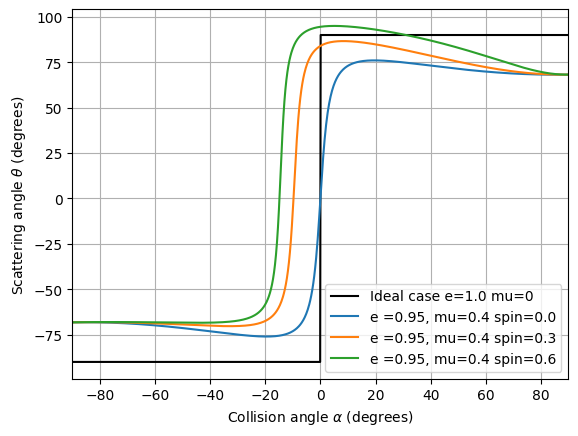

In [24]:
v0 =1
R = 1
m = 1
roll = v0 / R
spin = 0.8 * roll
V10 = np.array([v0, 0, 0])
W10 = np.array([0, roll, spin])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

alphas_deg = np.linspace(-90, 90, 1000)


def Scatter(mu, e):
  return np.array([scattering_angle(a, mu, e) for a in alphas_deg])

mu, e = 0, 1.0
th, th1, th2 = Scatter(mu, e).T
plt.plot(alphas_deg, th, color='black', label=f'Ideal case {e=} {mu=}')

e = 0.95
mu = 0.4
for spin in [0.,  0.3,   0.6]:
  W10 = np.array([0, roll, spin])
  th, th1, th2 = Scatter(mu, e).T
  plt.plot(alphas_deg, th, label=f'{e =}, {mu=} {spin=}')




plt.xlabel(r'Collision angle $\alpha$ (degrees)')
plt.ylabel(r'Scattering angle $\theta$ (degrees)')
plt.grid(True)
plt.legend()
#plt.ylim(0, 100)
plt.xlim(-90, 90)
plt.legend(loc='lower right')
#plt.axis('equal')
plt.show()


# Check. Angular momentum conservation

Total angular momentum relative to point $O$ is sum of orbital momentum $\vec L_{orb} = {\vec r} \times m \vec v$ and spin-roll angular momentum $\vec L_{spin} = I \vec \omega$.

Let's take $O$ - center of mass.
$$
\vec L_O = \vec r_1 \times m \vec v_1 + \vec r_2 \times m \vec v_2 + I\vec \omega_1 + I \vec \omega_2
$$
External moments are negligible for the time of collision, hence
$$
\Delta \vec L_O = 0.
$$
## Orbital moments
Impulses:
$$
\Delta (m \vec v_1) = - \vec J, \quad \Delta (m \vec v_2) = +\vec J.
$$
Orbital angular momentum:
$$
\Delta \vec L_{orb} = \vec r_1 \times \Delta(m \vec v_1) + \vec r_2 \times \Delta(m \vec v_2) = (\vec r_2 - \vec r_1) \times \vec J.
$$
Here $\vec r_2 - \vec r_1$ is a vector from center 1 to center 2. At the time of contact it's length is $R_1+R_2 = 2R$, direction $\vec n$.

Therefore
$$
\Delta L_{orb} = 2 R n \times J.
$$
## Spin moments
$$
\Delta I \vec \omega_1 = - R \vec n \times \vec J,\\
\Delta I \vec \omega_2 = - R \vec n \times \vec J,\\
\Delta \vec L_{spin} = \Delta I \vec \omega_1 + \Delta I \vec \omega_2 = -2 R n \times \vec J
$$

## Total angular momentum
$$
\Delta \vec L_O = \Delta \vec L_{orb} + \Delta \vec L_{spin} = 0
$$

# Reference

https://pubs.aip.org/aapt/ajp/article/56/9/815/1039419/Analysis-of-billiard-ball-collisions-in-two

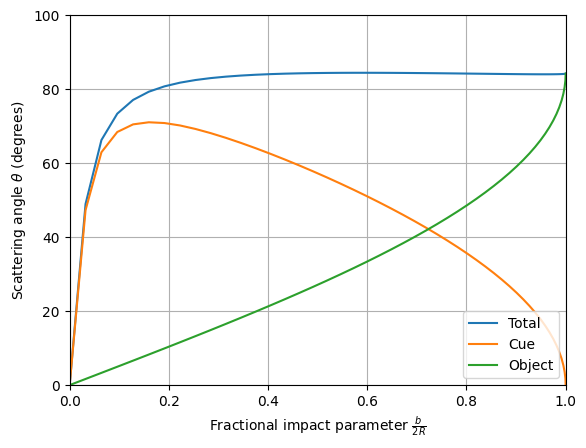

In [38]:
v0 =1
R = 1
m = 1
roll = v0 / R
spin = 0
V10 = np.array([v0, 0, 0])
W10 = np.array([0, roll, spin])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

# collision angle
alphas_deg = np.linspace(0, 90)

# fractional impact parameter
b = np.sin(np.deg2rad(alphas_deg))


def Scatter(mu, e):
  return np.array([scattering_angle(a, mu, e) for a in alphas_deg])

e = 0.95
mu = 0.1
th, th1, th2 = Scatter(mu, e).T
plt.plot(b, th, label='Total')
plt.plot(b, -th1, label='Cue')
plt.plot(b, th2, label='Object')





plt.xlabel(r'Fractional impact parameter $\frac{b}{2R}$')
plt.ylabel(r'Scattering angle $\theta$ (degrees)')
plt.grid(True)
plt.legend()
plt.ylim(0, 100)
plt.xlim(0, 1)
plt.legend(loc='lower right')
#plt.axis('equal')
plt.show()


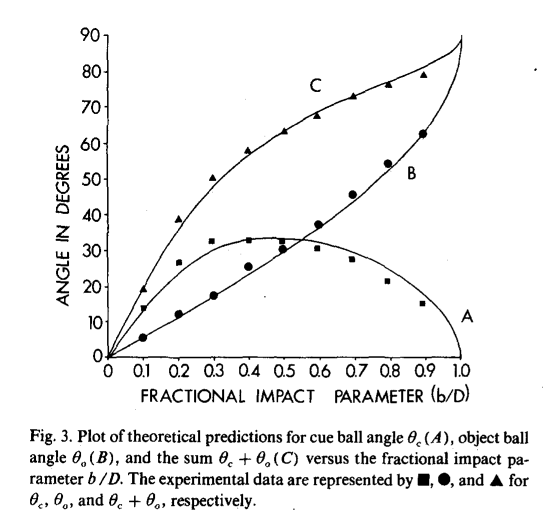